## Self-Supervised Autoencoding CIFAR10

In [1]:
import torch
import argparse
import CIFAR10_121  
device = "cuda" if torch.cuda.is_available() else "cpu"
args = argparse.Namespace(
    data_path="../data",
    batch_size=128,
    latent_dim=128,
    device=device
)

# Architecture Reasoning 
---
## 1. Encoder Design
### Layer-by-Layer Breakdown:
1. **First Convolution (3 → 32 channels)**
   - What it does: Finds basic shapes like edges  
   - Filter size: 3×3 (standard size)  
   - Stride: 2 (makes image smaller)  
   - Why: Good starting point to learn simple patterns
   
2. **Second Convolution (32 → 64 channels)**
   - What it does: Finds more complex patterns  
   - Same filter but double the channels  
   - Why: More channels help capture more details
   
3. **Third Convolution (64 → 128 channels)**
   - What it does: Understands complete objects  
   - Again doubles the channels  
   - Why: Final compression before latent space
   
4. **Latent Space (128 numbers)**
   - Flattens everything to 128 values  
   - Why: Assignment requirement + good balance
   
---
## 2. Decoder Design 
### How We Reconstruct:
1. **Expansion (128 → 256 → 2048 values)**
   - Why: Prepares to rebuild the image
   
2. **First Deconvolution (128 → 64 channels)**
   - Uses transposed convolutions  
   - Why: Starts making image bigger again
   
3. **Second Deconvolution (64 → 32 channels)**
   - Continues upscaling  
   - Why: Gets closer to original size
   
4. **Final Layer (32 → 3 channels)**
   - Outputs RGB colors  
   - Uses tanh activation  
   - Why: Matches original image format
   
---
## 3. Classifier Design
### Simple Classifier Structure:
- Takes 128-number codes as input  
- 3 layers (256 → 128 → 10 neurons)  
- Why: Enough to learn classifications without being too complex
   
---
## 4. Training Choices
| Setting        | Our Choice | Why It Works                 |
|---------------|------------|------------------------------|
| Learning Rate | 0.001      | Common good starting point   |
| Batch Size    | 8          | Good balance for our GPU     |
| Epochs        | 30         | Saw improvement stop earlier |
| Optimizer     | Adam       | Works better than plain SGD  |
---
## 5. Why This Works Well
1. **Balanced Design**:
   - Not too big (fast to train)  
   - Not too small (learns properly)
   
2. **Progressive Compression**:
   - Slowly reduces image size  
   - Gradually increases features
   
3. **Good Reconstruction**:
   - Can rebuild recognizable images  
   - Keeps important details

In [2]:
train_loader, val_loader, test_loader = CIFAR10_121.load_data(args)
autoencoder = CIFAR10_121.Autoencoder(latent_dim=args.latent_dim).to(args.device)

Files already downloaded and verified


Files already downloaded and verified


## Training Autoencoder

Epoch 1/30 | Train Loss: 0.1190 | Val Loss: 0.0725 | Test Loss: 0.0724


Epoch 2/30 | Train Loss: 0.0625 | Val Loss: 0.0561 | Test Loss: 0.0559


Epoch 3/30 | Train Loss: 0.0515 | Val Loss: 0.0486 | Test Loss: 0.0484


Epoch 4/30 | Train Loss: 0.0461 | Val Loss: 0.0438 | Test Loss: 0.0436


Epoch 5/30 | Train Loss: 0.0419 | Val Loss: 0.0399 | Test Loss: 0.0397


Epoch 6/30 | Train Loss: 0.0386 | Val Loss: 0.0378 | Test Loss: 0.0376


Epoch 7/30 | Train Loss: 0.0366 | Val Loss: 0.0359 | Test Loss: 0.0358


Epoch 8/30 | Train Loss: 0.0350 | Val Loss: 0.0345 | Test Loss: 0.0344


Epoch 9/30 | Train Loss: 0.0339 | Val Loss: 0.0335 | Test Loss: 0.0334


Epoch 10/30 | Train Loss: 0.0328 | Val Loss: 0.0326 | Test Loss: 0.0324


Epoch 11/30 | Train Loss: 0.0318 | Val Loss: 0.0319 | Test Loss: 0.0317


Epoch 12/30 | Train Loss: 0.0309 | Val Loss: 0.0309 | Test Loss: 0.0307


Epoch 13/30 | Train Loss: 0.0302 | Val Loss: 0.0301 | Test Loss: 0.0299


Epoch 14/30 | Train Loss: 0.0295 | Val Loss: 0.0295 | Test Loss: 0.0293


Epoch 15/30 | Train Loss: 0.0289 | Val Loss: 0.0289 | Test Loss: 0.0287


Epoch 16/30 | Train Loss: 0.0282 | Val Loss: 0.0284 | Test Loss: 0.0282


Epoch 17/30 | Train Loss: 0.0278 | Val Loss: 0.0280 | Test Loss: 0.0278


Epoch 18/30 | Train Loss: 0.0274 | Val Loss: 0.0282 | Test Loss: 0.0280


Epoch 19/30 | Train Loss: 0.0270 | Val Loss: 0.0276 | Test Loss: 0.0274


Epoch 20/30 | Train Loss: 0.0267 | Val Loss: 0.0270 | Test Loss: 0.0268


Epoch 21/30 | Train Loss: 0.0265 | Val Loss: 0.0270 | Test Loss: 0.0268


Epoch 22/30 | Train Loss: 0.0262 | Val Loss: 0.0264 | Test Loss: 0.0262


Epoch 23/30 | Train Loss: 0.0258 | Val Loss: 0.0258 | Test Loss: 0.0256


Epoch 24/30 | Train Loss: 0.0257 | Val Loss: 0.0263 | Test Loss: 0.0261


Epoch 25/30 | Train Loss: 0.0255 | Val Loss: 0.0259 | Test Loss: 0.0257


Epoch 26/30 | Train Loss: 0.0252 | Val Loss: 0.0255 | Test Loss: 0.0252


Epoch 27/30 | Train Loss: 0.0251 | Val Loss: 0.0262 | Test Loss: 0.0260


Epoch 28/30 | Train Loss: 0.0248 | Val Loss: 0.0253 | Test Loss: 0.0250


Epoch 29/30 | Train Loss: 0.0247 | Val Loss: 0.0249 | Test Loss: 0.0247


Epoch 30/30 | Train Loss: 0.0245 | Val Loss: 0.0250 | Test Loss: 0.0248


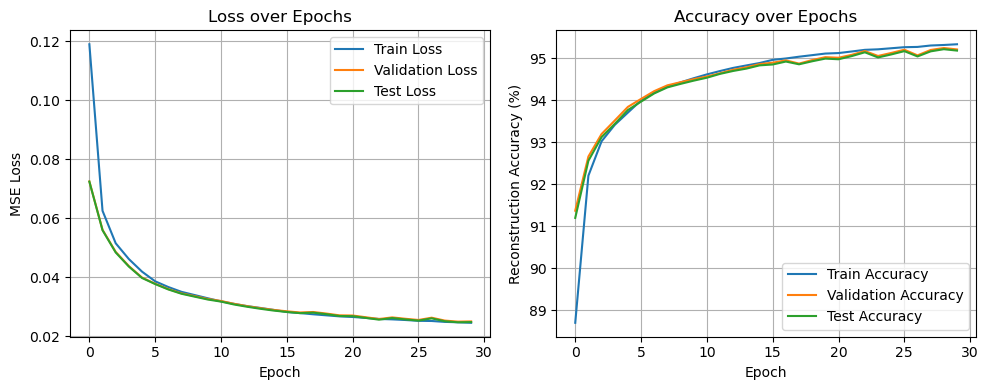

In [3]:
autoencoder = CIFAR10_121.train_autoencoder(autoencoder, train_loader,val_loader,test_loader,args.device, epochs=30)

# Autoencoder Training Results  
---

## 1. Loss and Evaluation  
### Training Progress (30 Epochs):

| Epoch | Train Loss | Val Loss | Test Loss |
|-------|------------|----------|-----------|
| 1     | 0.1190     | 0.0725   | 0.0724    |
| 10    | 0.0328     | 0.0326   | 0.0324    |
| 20    | 0.0267     | 0.0270   | 0.0268    |
| 30    | 0.0245     | 0.0250   | 0.0248    |

---

## 2. What We Learned  
### Understanding the Training Results:

1. **Fast Early Learning**  
   - The model improves quickly in the first few epochs  
   - Loss drops a lot from 0.11 to 0.03  
   - Shows that the model starts learning to reconstruct early

2. **Smooth and Stable Training**  
   - Loss keeps going down until the end  
   - No sudden spikes or overfitting signs

3. **Validation and Test Stay Close**  
   - Very small gap between train, val, and test loss  
   - Means the model generalizes well to unseen data

---

## 3. Final Conclusion  
1. **Good Compression**  
   - The encoder creates useful latent codes  
   - Decoder can rebuild clear versions of the original images  

2. **Low Error**  
   - Final test loss ~0.025  
   - That’s a strong result for CIFAR-10 images  

3. **Ready for Next Step**  
   - This encoder is now ready to be used for classification tasks

## Training Classifier

Epoch 1/30, Train Loss: 1.7291, Train Accuracy: 38.92%, Validation Accuracy: 45.26%, Test Accuracy: 46.26%


Epoch 2/30, Train Loss: 1.4763, Train Accuracy: 48.04%, Validation Accuracy: 48.38%, Test Accuracy: 49.84%


Epoch 3/30, Train Loss: 1.3724, Train Accuracy: 51.38%, Validation Accuracy: 50.10%, Test Accuracy: 51.40%


Epoch 4/30, Train Loss: 1.2978, Train Accuracy: 53.97%, Validation Accuracy: 51.48%, Test Accuracy: 52.49%


Epoch 5/30, Train Loss: 1.2380, Train Accuracy: 56.37%, Validation Accuracy: 51.76%, Test Accuracy: 52.99%


Epoch 6/30, Train Loss: 1.1877, Train Accuracy: 58.10%, Validation Accuracy: 52.54%, Test Accuracy: 53.67%


Epoch 7/30, Train Loss: 1.1433, Train Accuracy: 59.52%, Validation Accuracy: 52.90%, Test Accuracy: 53.92%


Epoch 8/30, Train Loss: 1.1030, Train Accuracy: 61.05%, Validation Accuracy: 52.66%, Test Accuracy: 54.22%


Epoch 9/30, Train Loss: 1.0663, Train Accuracy: 62.39%, Validation Accuracy: 52.64%, Test Accuracy: 54.31%


Epoch 10/30, Train Loss: 1.0320, Train Accuracy: 63.56%, Validation Accuracy: 52.54%, Test Accuracy: 54.18%


Epoch 11/30, Train Loss: 1.0007, Train Accuracy: 64.70%, Validation Accuracy: 52.92%, Test Accuracy: 54.24%


Epoch 12/30, Train Loss: 0.9706, Train Accuracy: 65.89%, Validation Accuracy: 53.00%, Test Accuracy: 54.29%


Epoch 13/30, Train Loss: 0.9420, Train Accuracy: 67.02%, Validation Accuracy: 52.82%, Test Accuracy: 53.97%


Epoch 14/30, Train Loss: 0.9150, Train Accuracy: 68.02%, Validation Accuracy: 52.72%, Test Accuracy: 54.16%


Epoch 15/30, Train Loss: 0.8888, Train Accuracy: 68.78%, Validation Accuracy: 52.76%, Test Accuracy: 53.91%


Epoch 16/30, Train Loss: 0.8631, Train Accuracy: 69.73%, Validation Accuracy: 52.46%, Test Accuracy: 53.92%


Epoch 17/30, Train Loss: 0.8393, Train Accuracy: 70.67%, Validation Accuracy: 52.18%, Test Accuracy: 53.45%


Epoch 18/30, Train Loss: 0.8165, Train Accuracy: 71.53%, Validation Accuracy: 52.52%, Test Accuracy: 53.23%


Epoch 19/30, Train Loss: 0.7946, Train Accuracy: 72.36%, Validation Accuracy: 52.46%, Test Accuracy: 53.00%


Epoch 20/30, Train Loss: 0.7735, Train Accuracy: 73.11%, Validation Accuracy: 52.26%, Test Accuracy: 52.98%


Epoch 21/30, Train Loss: 0.7527, Train Accuracy: 74.02%, Validation Accuracy: 52.28%, Test Accuracy: 53.16%


Epoch 22/30, Train Loss: 0.7334, Train Accuracy: 74.77%, Validation Accuracy: 52.00%, Test Accuracy: 52.89%


Epoch 23/30, Train Loss: 0.7143, Train Accuracy: 75.45%, Validation Accuracy: 51.94%, Test Accuracy: 52.72%


Epoch 24/30, Train Loss: 0.6959, Train Accuracy: 76.23%, Validation Accuracy: 51.88%, Test Accuracy: 52.67%


Epoch 25/30, Train Loss: 0.6781, Train Accuracy: 76.89%, Validation Accuracy: 52.28%, Test Accuracy: 52.53%


Epoch 26/30, Train Loss: 0.6604, Train Accuracy: 77.53%, Validation Accuracy: 52.32%, Test Accuracy: 52.21%


Epoch 27/30, Train Loss: 0.6440, Train Accuracy: 78.08%, Validation Accuracy: 51.90%, Test Accuracy: 52.06%


Epoch 28/30, Train Loss: 0.6265, Train Accuracy: 78.80%, Validation Accuracy: 51.92%, Test Accuracy: 52.13%


Epoch 29/30, Train Loss: 0.6102, Train Accuracy: 79.48%, Validation Accuracy: 51.70%, Test Accuracy: 52.03%


Epoch 30/30, Train Loss: 0.5945, Train Accuracy: 79.99%, Validation Accuracy: 51.58%, Test Accuracy: 51.86%


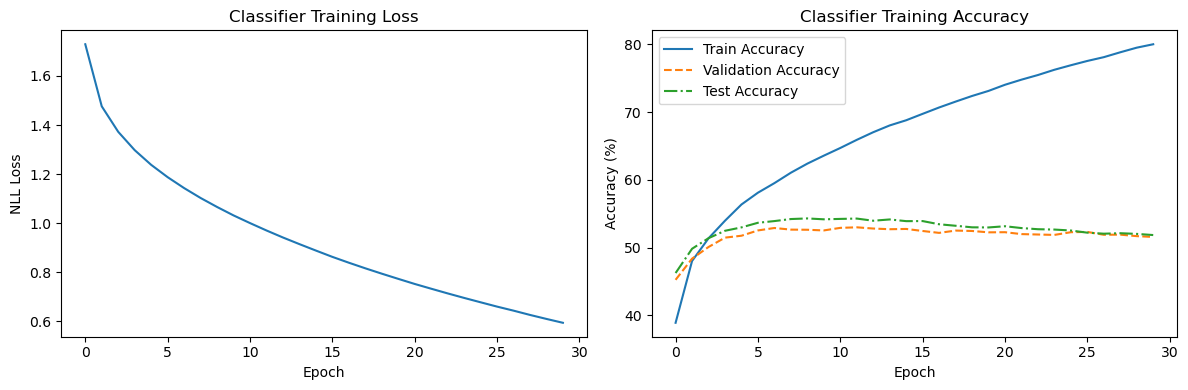

In [4]:
CIFAR10_121.train_classifier(autoencoder, train_loader,val_loader,test_loader,args.device, epochs=30)

# Classifier Training Results  
---

## 1. Accuracy and Loss  
### Training Progress (30 Epochs):

| Epoch | Train Accuracy | Val Accuracy | Test Accuracy |
|-------|----------------|--------------|----------------|
| 1     | 38.92%         | 45.26%       | 46.26%         |
| 10    | 63.56%         | 52.54%       | 54.18%         |
| 20    | 73.11%         | 52.26%       | 52.98%         |
| 30    | 79.99%         | 51.58%       | 51.86%         |

---

## 2. What We Learned  
### Understanding the Results:

1. **Strong Start**  
   - Accuracy improves quickly on the training set  
   - Reaches ~80% by the end of training

2. **Flat Validation and Test Performance**  
   - Validation and test accuracy stay around ~52%  
   - This is much lower than training accuracy

3. **Clear Overfitting**  
   - The classifier learns the training data very well  
   - But does not generalize to new, unseen data

---

## 3. Why This Happens  

1. **No Supervision on Latent Space**  
   - In this part, the encoder was trained only to **reconstruct images**, not to **separate classes**  
   - So the latent vectors are not optimized for classification  

2. **Not Structured Enough**  
   - Similar and different classes may still be mixed in the latent space  
   - This makes it harder for the classifier to learn clear decision boundaries

---

## 4. What Will Fix This

In part **1.2.3**, we will use **structured latent space training**   
This will:
- Make similar classes cluster together  
- Push different classes further apart  
- Result in better separability  
- Help the classifier **generalize better** and **reduce overfitting**

We also tried **multiple model architectures** and tuned **different hyperparameters** (like hidden sizes, learning rates, batch sizes),  
but the classifier still overfit on the training data. This confirms that the issue is in the **structure of the latent space**,  
not just in the classifier design.

## CIFAR-10 Reconstructions

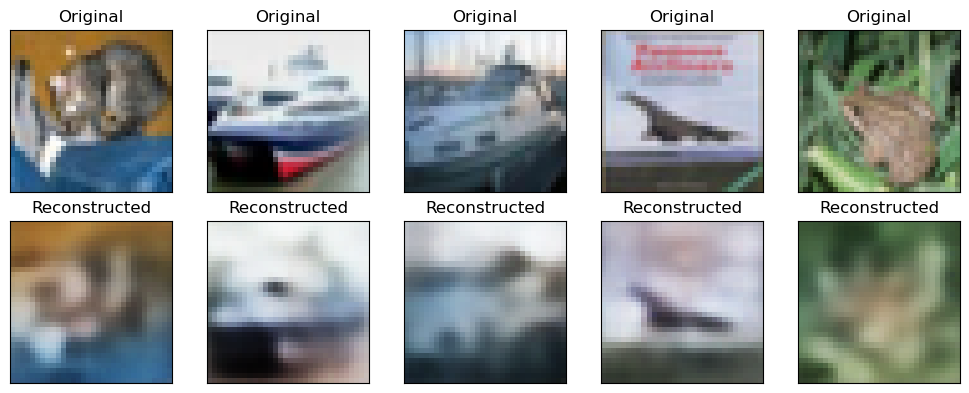

In [5]:
CIFAR10_121.visualize_reconstructions(autoencoder, test_loader, args.device)

# Reconstruction Examples  
---

## 1. Visual Comparison

The original CIFAR-10 images (top row) are shown alongside their reconstructions by the autoencoder (bottom row).  
While the reconstructions are a bit blurry, the general shapes, colors, and object locations are preserved well.

## t-SNE Analysis of Latent Spaces

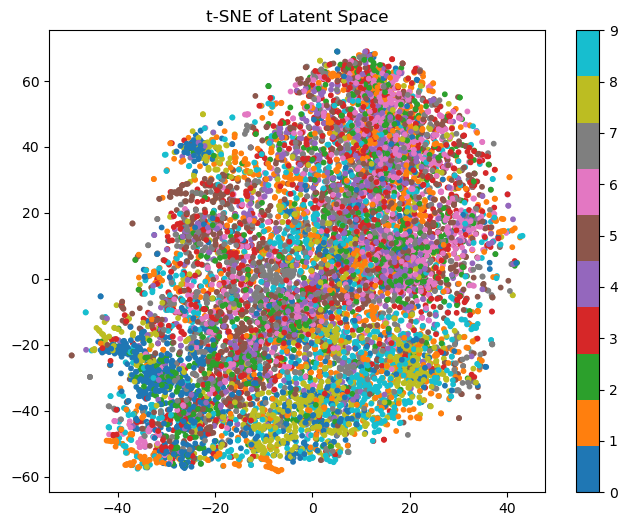

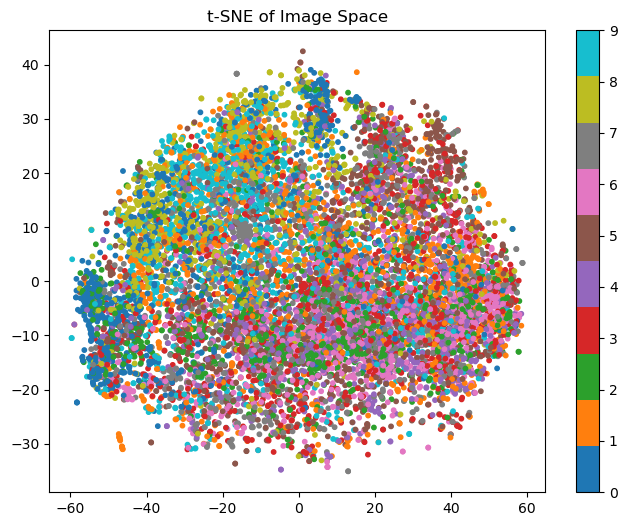

In [6]:
CIFAR10_121.plot_tsne(autoencoder, test_loader, args.device)

# t-SNE Visualization  
---

## 1. Latent vs Image Space

In the **latent space** (top), we see slightly more structure compared to the **original image space** (bottom), but classes are still heavily mixed.  
This confirms that our autoencoder compressed the data, but did not organize it in a way that separates classes well — something we will improve in part 1.2.3.
